In [9]:
from Bio import SeqIO
import pandas as pd
from Bio import Seq
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
kmers_female_set = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_female.txt', usecols=[0], header=None)
kmers_male_set = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_male.txt', usecols=[0], header=None)


In [12]:
print("Reading in k-mer sequences")
print("Writing fastq files...")
sequences = [SeqIO.SeqRecord(seq = Seq.Seq(seq[0]), id=str(idx)) for idx, seq in kmers_male_set.iterrows()]
SeqIO.write(sequences, '/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_male.fasta', "fasta")


print("Reading in k-mer sequences")
print("Writing fastq files...")
sequences = [SeqIO.SeqRecord(seq = Seq.Seq(seq[0]), id=str(idx)) for idx, seq in kmers_female_set.iterrows()]
SeqIO.write(sequences, '/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_female.fasta', "fasta")


Reading in k-mer sequences
Writing fastq files...
Reading in k-mer sequences
Writing fastq files...


369

In [16]:
%%bash
cd $MY_SCRATCH/tmp
kmers=/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_female.fasta
results=/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_female_blat_results.psl
hg38=/home/groups/dpwall/briannac/general_data/reference_genomes/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa
/oak/stanford/groups/dpwall/computeEnvironments/blat/blat  $hg38  $kmers test.psl

Loaded 3217346917 letters in 3366 sequences
Searched 36900 bases in 369 sequences


In [35]:
%%bash
cd $MY_SCRATCH/tmp
kmers=/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_male.fasta
results=/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_male_blat_results.psl
hg38=/home/groups/dpwall/briannac/general_data/reference_genomes/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa
/oak/stanford/groups/dpwall/computeEnvironments/blat/blat  $hg38  $kmers $results

[('chrUn_JTFH01001259v1_decoy', 85), ('chrUn_JTFH01001361v1_decoy', 50), ('chrUn_JTFH01001316v1_decoy', 50), ('chrUn_JTFH01001762v1_decoy', 42), ('chrUn_JTFH01001763v1_decoy', 38), ('chr2', 25), ('chrX', 21), ('chrUn_JTFH01001371v1_decoy', 18), ('chr1', 14), ('chr7', 13)]


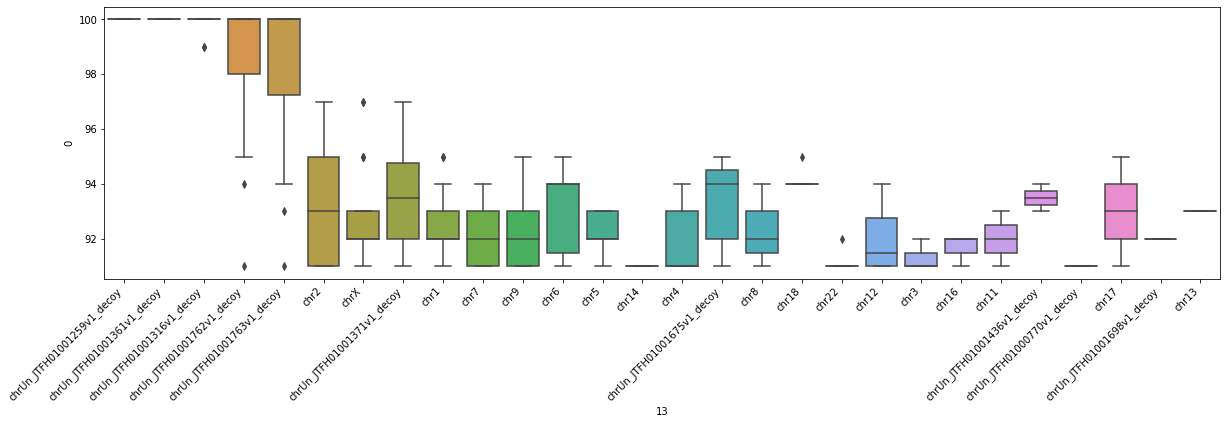

In [130]:
matches = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_female_blat_results.psl',
                       skiprows=5, header=None)
matches = matches[matches[0]>90]
matches['index'] = matches.index
grouped = matches#.loc[matches.groupby(9).aggregate(lambda x:x[0])['index']]
print(Counter(grouped[13]).most_common(10))
plt.figure(figsize=(20,5))
sns.boxplot(data=grouped,x=13, y=0, order=[i for i,_ in Counter(grouped[13]).most_common()])
plt.xticks(rotation = 45, ha='right') # Rotates X-Axis Ticks by 45-degrees
plt.show()


[('chrY', 12013), ('chrUn_JTFH01001433v1_decoy', 6416), ('chrUn_JTFH01001987v1_decoy', 5021), ('chrUn_JTFH01001512v1_decoy', 4789), ('chrUn_JTFH01000876v1_decoy', 4102), ('chrUn_JTFH01001506v1_decoy', 4070), ('chrUn_JTFH01001319v1_decoy', 2883), ('chrUn_JTFH01001317v1_decoy', 2479), ('chrUn_JTFH01001669v1_decoy', 1628), ('chrUn_JTFH01001981v1_decoy', 1497)]


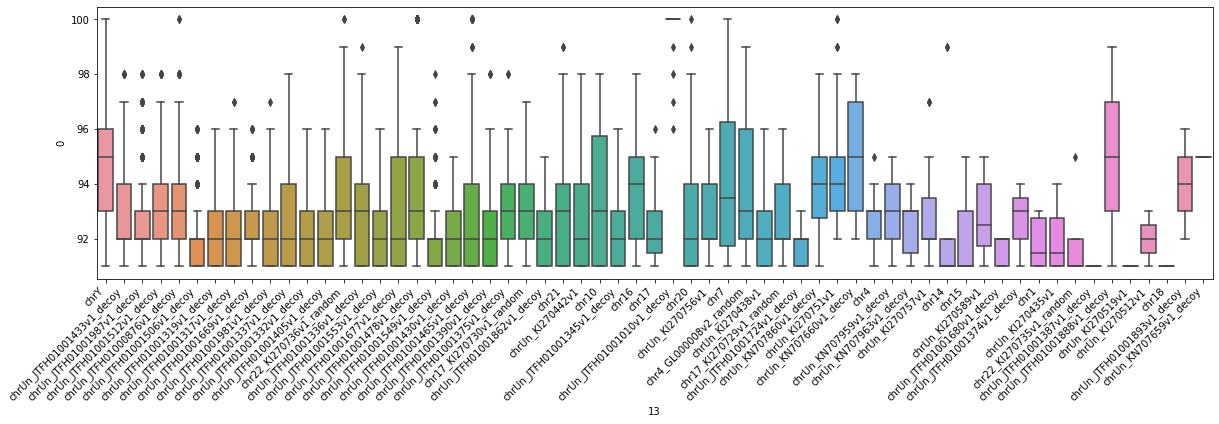

In [129]:
matches = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers_male_blat_results.psl',
                       skiprows=5, header=None)
matches = matches[matches[0]>90]
matches['index'] = matches.index
grouped = matches#.loc[matches.groupby(9).aggregate(lambda x:x[0])['index']]
print(Counter(grouped[13]).most_common(10))
plt.figure(figsize=(20,5))
sns.boxplot(data=grouped,x=13, y=0, order=[i for i,_ in Counter(grouped[13]).most_common()])#, scale='count', cut=0)
plt.xticks(rotation = 45, ha='right') # Rotates X-Axis Ticks by 45-degrees
plt.show()
